# Exploring the Electron-Positron EOS

In [1]:
import pynucastro as pyna

In [2]:
es = pyna.eos.ElectronEOS()

In [3]:
import numpy as np

In [4]:
Ts = np.logspace(4, 9, 26)
rhos = np.logspace(-4, 9, 66)

In [5]:
eta = np.zeros((len(rhos), len(Ts)))
p_e = np.zeros((len(rhos), len(Ts)))
p_pos = np.zeros((len(rhos), len(Ts)))
n_e = np.zeros((len(rhos), len(Ts)))
n_pos = np.zeros((len(rhos), len(Ts)))

In [6]:
comp = pyna.Composition(["he4"])
comp.set_equal()

In [7]:
for ir, rho in enumerate(rhos):
    for it, T in enumerate(Ts):
        state = es.pe_state(rho, T, comp, compute_derivs=False)
        eta[ir, it] = state.eta
        p_e[ir, it] = state.p_e
        p_pos[ir, it] = state.p_pos
        n_e[ir, it] = state.n_e
        n_pos[ir, it] = state.n_pos        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors

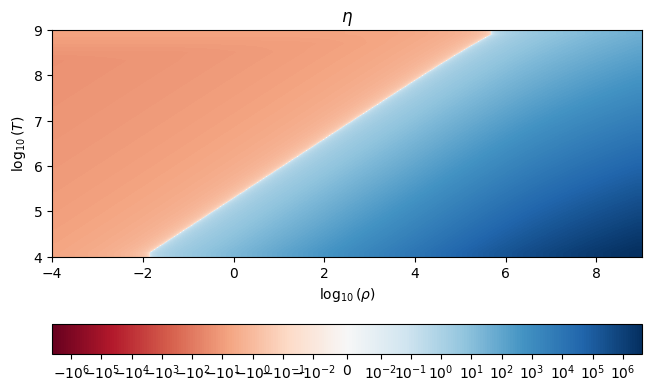

In [9]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(eta.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=0.01, vmin=-eta.max(), vmax=eta.max()),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear",
               cmap="RdBu")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$\eta$")
fig.colorbar(im, ax=ax, orientation="horizontal")

In [10]:
y = (n_pos / (n_pos + n_e))
y.min(), y.max()

(np.float64(0.0), np.float64(0.499999986135348))

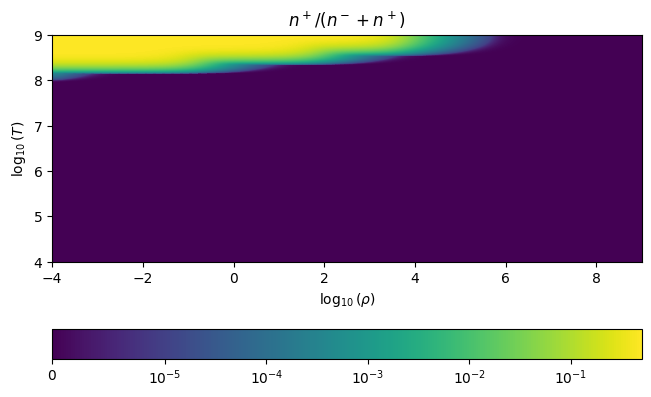

In [11]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(y.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=1.e-5, vmin=1.e-50, vmax=0.5, clip=True),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bicubic")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$n^+ / (n^- + n^+)$")
fig.colorbar(im, ax=ax, orientation="horizontal")